In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os

import statsmodels.api as sms 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# **Importar Datos** 

In [2]:
os.getcwd()

'/Users/osgaspar/Documents/PERSONAL/Cedesistemas/2023/Diplomado2023_02/ModelosSupervisados/Clasificacion/ProyectoMora'

In [3]:
df=pd.read_csv("BaseModelos.csv")

In [4]:
df.head()

,MontoCredito,Edad,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_0_-1,...,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,Genero_Homologado_Masculino,EducacionHomologada_Posgrado,EducacionHomologada_Pregrado,EstadoCivilHomologado_Otros,EstadoCivilHomologado_Soltero,Mora
0,20000.0,24.0,3913.0,0.0,689.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,1,0,1,0,0,1
1,120000.0,26.0,2682.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,...,0,0,0,0,1,0,1,0,1,1
2,90000.0,34.0,29239.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,...,0,0,0,0,1,0,1,0,1,0
3,50000.0,37.0,46990.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,...,0,0,0,0,1,0,1,0,0,0
4,50000.0,57.0,8617.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
df.shape

(30000, 73)

**Variables Importantes Segun Chi2 y Anova**

In [6]:
Cat_Chi2=pd.read_csv("CatSignificativasChi2.csv")["Variable"].tolist()

In [7]:
len(Cat_Chi2)

54

In [8]:
Num_Anova=pd.read_csv("NumericasSignificativasAnova.csv")["Variable"].tolist()

In [9]:
len(Num_Anova)

9

In [10]:
len(Cat_Chi2)+len(Num_Anova)

63

## **Configurar X e y**

In [11]:
VariablesPredictivas=Cat_Chi2+Num_Anova

In [12]:
len(VariablesPredictivas)

63

In [13]:
X=df[VariablesPredictivas]

In [14]:
X.shape

(30000, 63)

In [15]:
y=df[["Mora"]]

In [16]:
y.shape

(30000, 1)

**Distribucción del Target(Variable Objetivo)**

In [17]:
y.value_counts(normalize=True)

Mora
0       0.7788
1       0.2212
Name: proportion, dtype: float64

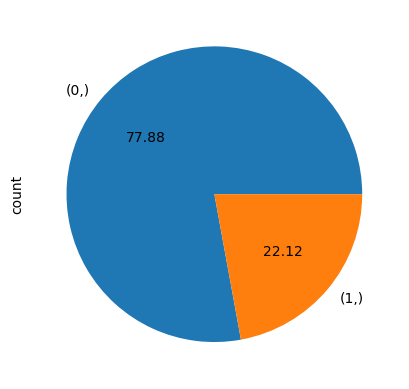

In [18]:
y.value_counts().plot(kind="pie",autopct="%.2f");

## **División Train- Test**

Evaluar la capacidad predictiva de un modelo consiste en comprobar la  aproximación de sus predicciones a los verdaderos valores de la variable respuesta. Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de prueba.

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123, stratify=y)

In [20]:
y_train.value_counts(normalize=True)

Mora
0       0.77881
1       0.22119
Name: proportion, dtype: float64

In [21]:
y_test.value_counts(normalize=True)

Mora
0       0.778778
1       0.221222
Name: proportion, dtype: float64

## **Modelado**

Los términos inferencia y predicción describen tareas en las que aprendemos de los datos de manera supervisada para encontrar un modelo que describa la relación entre las variables independientes y el resultado. Sin embargo, la inferencia y la predicción divergen cuando se trata del uso del modelo resultante:

* Inferencia: use el modelo para aprender sobre el proceso de generación de datos.
* Predicción: utilice el modelo para predecir los resultados de nuevos puntos de datos

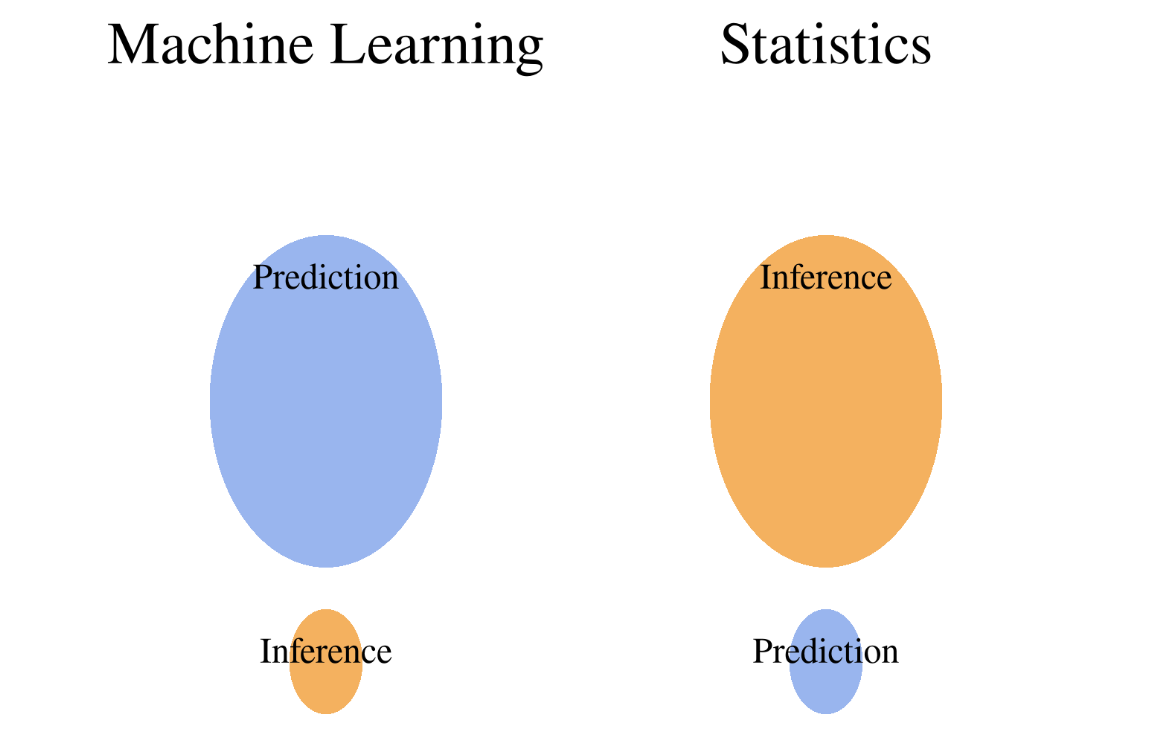

# **Enfoque Estadístico**

La regresión logística es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.

Se llama regresión logística simple cuando solo hay una variable independiente y regresión logística múltiple cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores o features.

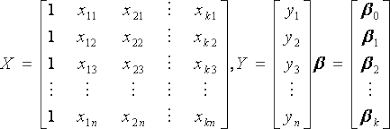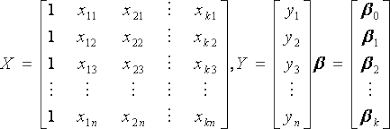

In [22]:
x_train

,PAY_5_6,PAY_0_6,PAY_6_8,PAY_6_5,EducacionHomologada_Pregrado,PAY_0_5,PAY_5_5,EstadoCivilHomologado_Soltero,PAY_0_8,PAY_3_5,...,PAY_0_2,Edad,BILL_AMT1,PAY_AMT6,PAY_AMT5,PAY_AMT3,PAY_AMT4,PAY_AMT2,PAY_AMT1,MontoCredito
14451,0,0,0,0,0,0,0,0,0,0,...,0,52.0,2912.0,780.0,390.0,780.0,780.0,780.0,390.0,20000.0
18392,0,0,0,0,1,0,0,1,0,0,...,0,24.0,160.0,0.0,0.0,12511.0,1249.0,586.0,237.0,230000.0
24955,0,0,0,0,0,0,0,1,0,0,...,0,31.0,0.0,0.0,0.0,3730.0,200.0,0.0,238.0,360000.0
7162,0,0,0,0,1,0,0,0,0,0,...,1,26.0,89947.0,3100.0,3700.0,3500.0,3500.0,4300.0,5000.0,90000.0
12125,0,0,0,0,0,0,0,1,0,0,...,0,29.0,6345.0,300.0,0.0,412.0,694.0,1118.0,0.0,20000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27165,0,0,0,0,1,0,0,0,0,0,...,0,40.0,238094.0,5000.0,10000.0,6000.0,5000.0,8000.0,0.0,280000.0
3228,0,0,0,0,1,0,0,0,0,0,...,0,26.0,43721.0,1340.0,1300.0,1660.0,1457.0,2500.0,2228.0,50000.0
23477,0,0,0,0,1,0,0,1,0,0,...,0,30.0,31708.0,1500.0,0.0,3200.0,1500.0,1850.0,0.0,100000.0
22177,0,0,0,0,1,0,0,1,0,0,...,0,27.0,1261.0,390.0,390.0,1651.0,0.0,1261.0,1261.0,310000.0


In [23]:
y_train

,Mora
14451,0
18392,1
24955,0
7162,0
12125,0
...,...
27165,0
3228,0
23477,1
22177,1


In [24]:
x_train_statsmodels= sms.add_constant(x_train)
x_test_statsmodels= sms.add_constant(x_test)

In [25]:
x_test_statsmodels.head()

,const,PAY_5_6,PAY_0_6,PAY_6_8,PAY_6_5,EducacionHomologada_Pregrado,PAY_0_5,PAY_5_5,EstadoCivilHomologado_Soltero,PAY_0_8,...,PAY_0_2,Edad,BILL_AMT1,PAY_AMT6,PAY_AMT5,PAY_AMT3,PAY_AMT4,PAY_AMT2,PAY_AMT1,MontoCredito
45,1.0,0,0,0,0,0,0,0,1,0,...,0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,210000.0
18762,1.0,0,0,0,0,0,0,0,1,0,...,0,29.0,52898.0,84363.0,0.0,0.0,0.0,0.0,3000.0,420000.0
9341,1.0,0,0,0,0,1,0,0,1,0,...,0,35.0,67306.0,2000.0,1700.0,1600.0,1600.0,2310.0,3400.0,70000.0
21814,1.0,0,0,0,0,1,0,0,1,0,...,0,26.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,180000.0
25950,1.0,0,0,0,0,0,0,0,0,0,...,0,32.0,388.0,4200.0,8000.0,388.0,110345.0,388.0,388.0,410000.0


In [26]:
## Intanciar Modelos
Modelo_Logit=sms.Logit(endog=y_train,exog=x_train_statsmodels).fit(method="bfgs") # method="bfgs"

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3


In [27]:
Modelo_Logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    -0.312    
Dependent Variable:    Mora                AIC:                 29240.1816
Date:                  2023-11-01 20:16    BIC:                 29749.1274
No. Observations:      21000               Log-Likelihood:      -14556.   
Df Model:              63                  LL-Null:             -11097.   
Df Residuals:          20936               LLR p-value:         1.0000    
Converged:             0.0000              Scale:               1.0000    
Method:                MLE                                                
--------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z|   [0.025 0.975]
--------------------------------------------------------------------------
const                         0.0000   0.1038 0.0000 1.0000 -0.2034 0.2034
PAY_5_6                       0.0000   2.3486 0.0000 1.0000 -4.6032 4.6032
PAY_0_6                       0.0000   1.0610 0.0000 1.0000 -2.0795 2.0795
PAY_6_8                       0.0000   2.0047 0.0000 1.0000 -3.9291 3.9291
PAY_6_5                       0.0000   0.8044 0.0000 1.0000 -1.5765 1.5765
EducacionHomologada_Pregrado  0.0000   0.0405 0.0000 1.0000 -0.0795 0.0795
PAY_0_5                       0.0000   0.5769 0.0000 1.0000 -1.1308 1.1308
PAY_5_5                       0.0000   0.9779 0.0000 1.0000 -1.9167 1.9167
EstadoCivilHomologado_Soltero 0.0000   0.0318 0.0000 1.0000 -0.0623 0.0623
PAY_0_8                       0.0000   2.2090 0.0000 1.0000 -4.3296 4.3296
PAY_3_5                       0.0000   0.8708 0.0000 1.0000 -1.7067 1.7067
PAY_0_7                       0.0000   1.6313 0.0000 1.0000 -3.1973 3.1973
PAY_2_7                       0.0000   2.7671 0.0000 1.0000 -5.4233 5.4233
PAY_4_5                       0.0000   0.8372 0.0000 1.0000 -1.6408 1.6408
Genero_Homologado_Masculino   0.0000   0.0286 0.0000 1.0000 -0.0561 0.0561
PAY_2_6                       0.0000   1.6414 0.0000 1.0000 -3.2170 3.2170
PAY_3_6                       0.0000   1.5472 0.0000 1.0000 -3.0326 3.0326
PAY_2_5                       0.0000   0.8160 0.0000 1.0000 -1.5994 1.5994
PAY_6_6                       0.0000   1.0392 0.0000 1.0000 -2.0368 2.0368
PAY_2_4                       0.0000   0.3525 0.0000 1.0000 -0.6908 0.6908
PAY_6_4                       0.0000   0.4894 0.0000 1.0000 -0.9592 0.9592
EducacionHomologada_Posgrado  0.0000   0.0444 0.0000 1.0000 -0.0870 0.0870
PAY_3_7                       0.0000   0.6249 0.0000 1.0000 -1.2247 1.2247
PAY_3_4                       0.0000   0.4434 0.0000 1.0000 -0.8690 0.8690
PAY_5_4                       0.0000   0.4607 0.0000 1.0000 -0.9030 0.9030
PAY_4_4                       0.0000   0.4564 0.0000 1.0000 -0.8945 0.8945
PAY_6_-1                      0.0000   0.0758 0.0000 1.0000 -0.1486 0.1486
PAY_0_-1                      0.0000   0.0977 0.0000 1.0000 -0.1916 0.1916
PAY_0_4                       0.0000   0.3142 0.0000 1.0000 -0.6158 0.6158
PAY_6_7                       0.0000   1.2165 0.0000 1.0000 -2.3842 2.3842
PAY_6_0                       0.0000   0.0802 0.0000 1.0000 -0.1572 0.1572
PAY_5_0                       0.0000   0.1074 0.0000 1.0000 -0.2105 0.2105
PAY_5_-1                      0.0000   0.0979 0.0000 1.0000 -0.1920 0.1920
PAY_5_7                       0.0000   2.2234 0.0000 1.0000 -4.3578 4.3578
PAY_4_7                       0.0000   2.0639 0.0000 1.0000 -4.0451 4.0451
PAY_4_-1                      0.0000   0.0988 0.0000 1.0000 -0.1936 0.1936
PAY_2_-1                      0.0000   0.1057 0.0000 1.0000 -0.2073 0.2073
PAY_4_0                       0.0000   0.1091 0.0000 1.0000 -0.2137 0.2137
PAY_3_-1                      0.0000   0.0966 0.0000 1.0000 -0.1894 0.1894
PAY_4_3                       0.0000   0.2479 0.0000 1.0000 -0.4859 0.4859
PAY_3_

## **Supuesto de los Modelos Lineales**

Un modelo lineal, en el contexto de regresión lineal, se basa en varios supuestos clave para que sus estimaciones y predicciones sean válidas y confiables. Aquí están los supuestos más comunes de un modelo de regresión lineal:

* y= b0+b1*x1+b2*x2+e


* Linealidad: El supuesto fundamental es que la relación entre las variables independientes (predictoras) y la variable dependiente (respuesta) es lineal. Esto significa que el efecto de un cambio en una variable predictora es constante, independientemente del valor de las otras variables.

* Independencia de errores: Se asume que los errores (residuos) del modelo no están correlacionados entre sí. En otras palabras, no debe haber patrones sistemáticos en los errores. La independencia de errores es esencial para que las estimaciones de los coeficientes sean no sesgadas y eficientes.

* Homocedasticidad: Significa que la varianza de los errores debe ser constante en todos los niveles de las variables predictoras. En otras palabras, la dispersión de los errores debe ser uniforme a lo largo de toda la gama de valores de las variables predictoras.

* Normalidad de errores: Se asume que los errores siguen una distribución normal. Esto es importante para realizar inferencias estadísticas y pruebas de hipótesis sobre los coeficientes del modelo.

* No multicolinealidad: Se espera que las variables predictoras no estén altamente correlacionadas entre sí, ya que la multicolinealidad puede dificultar la interpretación de los coeficientes y hacer que las estimaciones sean inestables.

* Ausencia de endogeneidad: Se asume que las variables predictoras no están correlacionadas con los errores del modelo. La endogeneidad puede introducir sesgos en las estimaciones.

* Ausencia de valores atípicos (outliers): Valores atípicos pueden distorsionar las estimaciones y, por lo tanto, se asume que no hay valores atípicos que afecten significativamente el modelo.

## **Identifcar multicolinealidad**

**El Análisis de VIF (Variance Inflation Factor, por sus siglas en inglés)**


La multicolinealidad entre variables independientes en un modelo de regresión. La multicolinealidad es una situación en la que dos o más variables independientes en un modelo de regresión están altamente correlacionadas entre sí, lo que puede causar problemas al estimar los coeficientes de regresión y dificultar la interpretación de los resultados.

El VIF mide cuánto se infla la varianza de los coeficientes de regresión debido a la multicolinealidad. Un VIF alto indica una alta multicolinealidad y sugiere que una variable es predecible a partir de las otras en el modelo. Generalmente, se considera que un VIF mayor a 10 o 5 indica multicolinealidad problemática

In [28]:
x=x_test_statsmodels.drop(["const"],axis=1)

In [29]:
ResultadoVif=pd.DataFrame()

ResultadoVif["Variable"]=x.columns
ResultadoVif["Vif"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns)) ]   

In [30]:
ResultadoVif.sort_values("Vif",ascending=False).head(10)

,Variable,Vif
0,PAY_5_6,inf
15,PAY_3_6,inf
11,PAY_2_7,inf
8,PAY_0_8,inf
45,PAY_2_0,43.692338
42,PAY_3_0,33.527582
36,PAY_4_0,33.432038
30,PAY_5_0,32.262943
33,PAY_4_7,28.739008
47,PAY_0_0,27.680321


In [31]:
EliminarVif=ResultadoVif["Variable"][ResultadoVif["Vif"]>=20].tolist()
print(f'La cantidad: {len(EliminarVif)} y son: {EliminarVif}')

La cantidad: 11 y son: ['PAY_5_6', 'PAY_0_8', 'PAY_2_7', 'PAY_3_6', 'PAY_5_0', 'PAY_5_7', 'PAY_4_7', 'PAY_4_0', 'PAY_3_0', 'PAY_2_0', 'PAY_0_0']


In [32]:
x_test_statsmodelsVif=x_test_statsmodels.drop(columns=EliminarVif)
x_train_statsmodelsVif=x_train_statsmodels.drop(columns=EliminarVif)

In [33]:
Modelo_LogitFinal=sms.Logit(endog=y_train,exog=x_train_statsmodelsVif).fit(method="bfgs") 

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3


In [34]:
Modelo_LogitFinal.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    -0.312    
Dependent Variable:    Mora                AIC:                 29218.1816
Date:                  2023-11-01 20:16    BIC:                 29639.6523
No. Observations:      21000               Log-Likelihood:      -14556.   
Df Model:              52                  LL-Null:             -11097.   
Df Residuals:          20947               LLR p-value:         1.0000    
Converged:             0.0000              Scale:               1.0000    
Method:                MLE                                                
--------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z|   [0.025 0.975]
--------------------------------------------------------------------------
const                         0.0000   0.0961 0.0000 1.0000 -0.1884 0.1884
PAY_0_6                       0.0000   1.0165 0.0000 1.0000 -1.9922 1.9922
PAY_6_8                       0.0000   1.9523 0.0000 1.0000 -3.8264 3.8264
PAY_6_5                       0.0000   0.6340 0.0000 1.0000 -1.2425 1.2425
EducacionHomologada_Pregrado  0.0000   0.0405 0.0000 1.0000 -0.0794 0.0794
PAY_0_5                       0.0000   0.5748 0.0000 1.0000 -1.1265 1.1265
PAY_5_5                       0.0000   0.8586 0.0000 1.0000 -1.6828 1.6828
EstadoCivilHomologado_Soltero 0.0000   0.0318 0.0000 1.0000 -0.0622 0.0622
PAY_3_5                       0.0000   0.8138 0.0000 1.0000 -1.5949 1.5949
PAY_0_7                       0.0000   1.5850 0.0000 1.0000 -3.1066 3.1066
PAY_4_5                       0.0000   0.5732 0.0000 1.0000 -1.1234 1.1234
Genero_Homologado_Masculino   0.0000   0.0286 0.0000 1.0000 -0.0560 0.0560
PAY_2_6                       0.0000   1.5978 0.0000 1.0000 -3.1316 3.1316
PAY_2_5                       0.0000   0.7701 0.0000 1.0000 -1.5094 1.5094
PAY_6_6                       0.0000   0.6413 0.0000 1.0000 -1.2569 1.2569
PAY_2_4                       0.0000   0.3404 0.0000 1.0000 -0.6671 0.6671
PAY_6_4                       0.0000   0.4710 0.0000 1.0000 -0.9231 0.9231
EducacionHomologada_Posgrado  0.0000   0.0443 0.0000 1.0000 -0.0868 0.0868
PAY_3_7                       0.0000   0.5954 0.0000 1.0000 -1.1670 1.1670
PAY_3_4                       0.0000   0.4347 0.0000 1.0000 -0.8520 0.8520
PAY_5_4                       0.0000   0.4394 0.0000 1.0000 -0.8611 0.8611
PAY_4_4                       0.0000   0.4446 0.0000 1.0000 -0.8715 0.8715
PAY_6_-1                      0.0000   0.0590 0.0000 1.0000 -0.1157 0.1157
PAY_0_-1                      0.0000   0.0607 0.0000 1.0000 -0.1190 0.1190
PAY_0_4                       0.0000   0.3070 0.0000 1.0000 -0.6017 0.6017
PAY_6_7                       0.0000   0.4794 0.0000 1.0000 -0.9396 0.9396
PAY_6_0                       0.0000   0.0434 0.0000 1.0000 -0.0850 0.0850
PAY_5_-1                      0.0000   0.0575 0.0000 1.0000 -0.1127 0.1127
PAY_4_-1                      0.0000   0.0587 0.0000 1.0000 -0.1150 0.1150
PAY_2_-1                      0.0000   0.0655 0.0000 1.0000 -0.1284 0.1284
PAY_3_-1                      0.0000   0.0606 0.0000 1.0000 -0.1187 0.1187
PAY_4_3                       0.0000   0.2251 0.0000 1.0000 -0.4413 0.4413
PAY_3_3                       0.0000   0.2029 0.0000 1.0000 -0.3978 0.3978
PAY_5_3                       0.0000   0.2184 0.0000 1.0000 -0.4280 0.4280
PAY_6_3                       0.0000   0.2253 0.0000 1.0000 -0.4415 0.4415
PAY_2_3                       0.0000   0.1589 0.0000 1.0000 -0.3114 0.3114
PAY_0_1                       0.0000   0.0559 0.0000 1.0000 -0.1096 0.1096
PAY_0_3                       0.0000   0.1524 0.0000 1.0000 -0.2987 0.2987
PAY_6_2                       0.0000   0.0738 0.0000 1.0000 -0.1446 0.1446
PAY_5_2                       0.0000   0.0738 0.0000 1.0000 -0.1446 0.1446
PAY_4_